In [1]:
import numpy as np
from Turbinen_class_file import Francis_Turbine
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
%matplotlib widget

#importing pressure conversion function
import sys
import os
current = os.path.dirname(os.path.realpath('messy.ipynb'))
parent = os.path.dirname(current)
sys.path.append(parent)
from functions.pressure_conversion import pressure_conversion


In [2]:
Q_nenn = 0.85
p_nenn,_ = pressure_conversion(10.6,'bar','Pa')
Untertweng1 = Francis_Turbine(Q_nenn,p_nenn)
print(Untertweng1.A)

0.018834355072879172


In [3]:
n_p = 201
n_LA = 201

ps = np.linspace(0,2*Untertweng1.p_n,n_p,endpoint=True)
LAs = np.linspace(0,1,n_LA,endpoint=True)

Text(0.5, 0, 'Q [m³/s]')

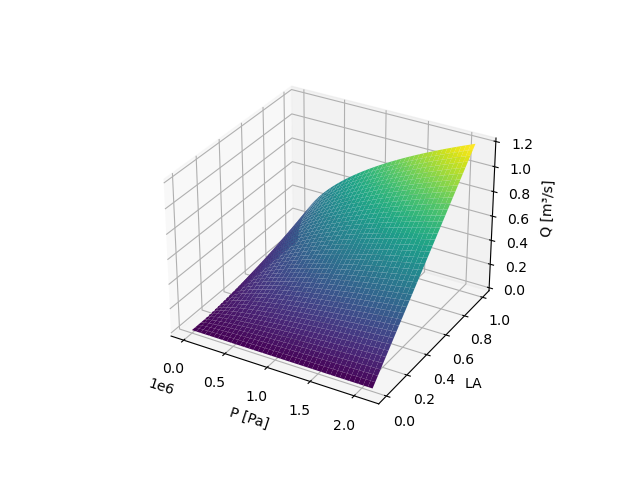

In [4]:
Q_mat = np.empty([n_LA,n_p])

pp,ll = np.meshgrid(ps,LAs)
Q_mat = Untertweng1.get_Q(pp,ll)

fig1 = plt.figure()
ax1 = plt.axes(projection='3d')

ax1.plot_surface(pp, ll, Q_mat,cmap='viridis', edgecolor='none')
ax1.set_xlabel('P [Pa]')
ax1.set_ylabel('LA')
ax1.set_zlabel('Q [m³/s]')


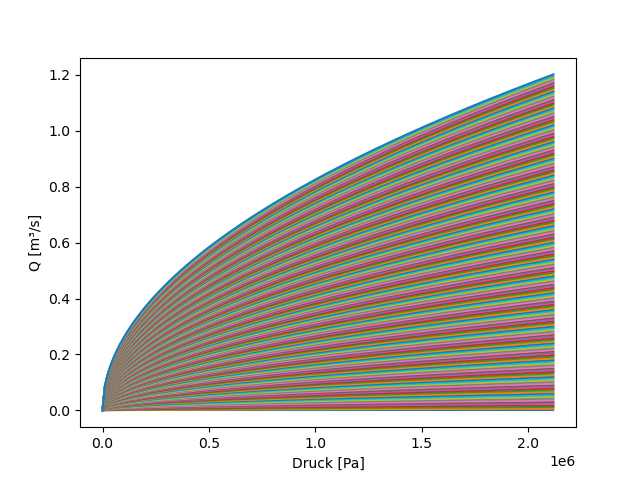

In [9]:
d_LA_test = 1/(n_LA-1)

LA_test = np.arange(0,n_LA,1)*d_LA_test

fig = plt.figure()
plt.xlabel('Druck [Pa]')
plt.ylabel('Q [m³/s]')

for i in range(n_LA):
    LA_index = int(np.argwhere(LAs == LA_test[i]))
    plt.plot(ps,Q_mat[LA_index,:])

Text(0.5, 1.0, 'P = 1144800.0 [Pa]')

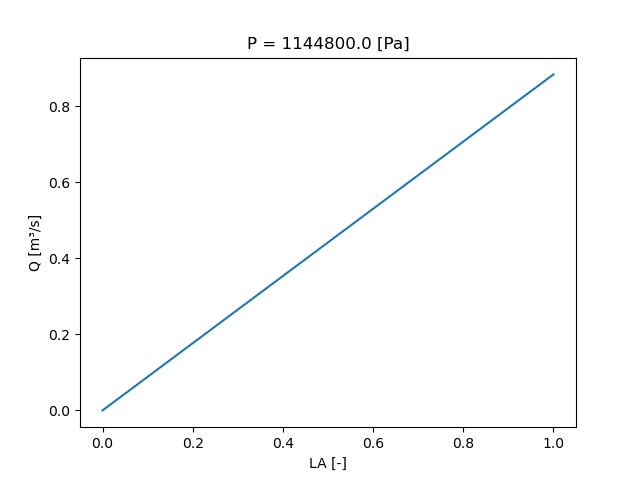

In [11]:
p_test,_ = pressure_conversion(11.4,'bar','Pa')
p_index = int(np.argmin(abs(ps-p_test)))
p_test2 = ps[p_index]

fig = plt.figure()
plt.plot(LAs,Q_mat[:,p_index])
plt.xlabel('LA [-]')
plt.ylabel('Q [m³/s]')
plt.title('P = '+ str(p_test2) + ' [Pa]')